In [3]:
import torch 
from torch import nn

In [4]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super().__init__()        
        self.mlp = nn.Sequential(
            nn.Linear(28 * 28, 50),
            nn.ReLU(),          
            nn.Linear(50, 15),
            nn.ReLU(),     
            nn.Linear(15,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):        
        return self.mlp(x)

In [5]:

import numpy as np
from urllib import request
import gzip
import pickle

import random 
def shuffle_data(x, y):
    c = list(zip(x, y))
    random.shuffle(c)
    return zip(*c)

filename = [
    ["training_images","train-images-idx3-ubyte.gz"],
    ["test_images","t10k-images-idx3-ubyte.gz"],
    ["training_labels","train-labels-idx1-ubyte.gz"],
    ["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def preprocess(x):
    return [y.flatten()  for y in x]


def normalize(x):
    mean_val = np.mean(x)
    stdev_val = np.std(x)
    return (x - mean_val) / stdev_val

def load(n = 5000):
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return (
        normalize(preprocess(mnist["training_images"][:n]  / 255.)), 
        [x[0] for x in preprocess(mnist["training_labels"][:n])], 
        normalize(preprocess(mnist["test_images"][:n]  / 255.)), 
        [x[0] for x in preprocess(mnist["test_labels"][:n])]
    )

init()




Download complete.
Save complete.


In [6]:
x_train, y_train, x_test, y_test = load()
x_train, y_train = zip(*[x for x in list(zip(x_train, y_train)) if x[1] == 5 or (random.random() < 0.12)])
x_test, y_test = zip(*[x for x in list(zip(x_test, y_test)) if x[1] == 5 or (random.random() < 0.12)])

In [7]:
# Wczytaj dane powyżej 


In [8]:
# TODO: 
# ile elementów zawiera x_train, x_test [len] 
len(x_train), len(x_test)

(991, 983)

In [9]:
# TODO: 
# jaką długość mają wektory w x_train, x_test, zbadaj elementy o indeksie 0 
len(x_train[0])

784

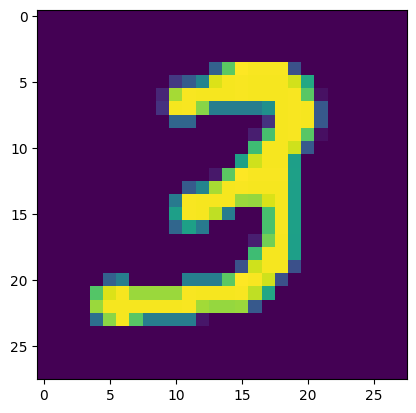

In [10]:
# TODO: 
# Zmień rozmiar przykładowego wektora na 28x28 i przypisz do zmiennej img [reshape] 
N = 19
img = x_train[N].reshape((28,28))
# TODO: pokaż jak wygląda img [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html]
from matplotlib import pyplot as plt 
plt.imshow(img)


In [11]:
# TODO: napisz funkcję która dla wejściowej listy etykiet zwraca jego binarny odpowiednik  
# dla każdego elementu w wejściowej liście sprawdź czy jest to "5" - jeśli tak przypisz jej wartość "1" w przeciwnym razie przypisz "0"
def binarize(y):
	return [1 if label == 5 else 0 for label in y]

In [12]:
# TODO: zbinaryzuj y_train i y_test i zapisz do y_train_bin i y_test_bin 
y_train_bin = binarize(y_train)
y_test_bin = binarize(y_test)

In [13]:
# training loop with test set bce_loss

model = MultiLayerPerceptron()

bce_loss = torch.nn.BCELoss() 
losses = []
test_losses = [] 
batch_size = 256
adam_optimizer = torch.optim.Adam(model.parameters())
nr_of_epochs = 150

for epoch in range(nr_of_epochs):
    print(f"Starting {epoch=}")
    print(f"Shuffling data")
    x, y = shuffle_data(x_train,y_train_bin)
    current_index = 0 
    while current_index < len(x_train):

        # x, y
        batch_x = x[current_index:(current_index + batch_size)] 
        batch_y = y[current_index:(current_index + batch_size)]
         
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1) # target 

        x_test_tensor = torch.Tensor(x_test)
        y_test_tensor = torch.Tensor(y_test_bin).reshape(-1,1)
        
        test_loss = bce_loss(model.forward(x_test_tensor), y_test_tensor)
        test_losses.append(float(test_loss.detach().numpy()))
        
        pred = model.forward(tensor_batch_x) # TODO [model forward tensor]  # m(input) [pred]
        loss = bce_loss(pred, tensor_batch_y)

        # Backpropagation
        loss.backward()
        adam_optimizer.step()
        adam_optimizer.zero_grad()
        
        current_index += batch_size
        losses.append(float(loss.detach().numpy()))
    


Starting epoch=0
Shuffling data


/tmp/ipykernel_1789929/3082819677.py:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  tensor_batch_x = torch.Tensor(batch_x)


Starting epoch=1
Shuffling data
Starting epoch=2
Shuffling data
Starting epoch=3
Shuffling data
Starting epoch=4
Shuffling data
Starting epoch=5
Shuffling data
Starting epoch=6
Shuffling data
Starting epoch=7
Shuffling data
Starting epoch=8
Shuffling data
Starting epoch=9
Shuffling data
Starting epoch=10
Shuffling data
Starting epoch=11
Shuffling data
Starting epoch=12
Shuffling data
Starting epoch=13
Shuffling data
Starting epoch=14
Shuffling data
Starting epoch=15
Shuffling data
Starting epoch=16
Shuffling data
Starting epoch=17
Shuffling data
Starting epoch=18
Shuffling data
Starting epoch=19
Shuffling data
Starting epoch=20
Shuffling data
Starting epoch=21
Shuffling data
Starting epoch=22
Shuffling data
Starting epoch=23
Shuffling data
Starting epoch=24
Shuffling data
Starting epoch=25
Shuffling data
Starting epoch=26
Shuffling data
Starting epoch=27
Shuffling data
Starting epoch=28
Shuffling data
Starting epoch=29
Shuffling data
Starting epoch=30
Shuffling data
Starting epoch=31
S

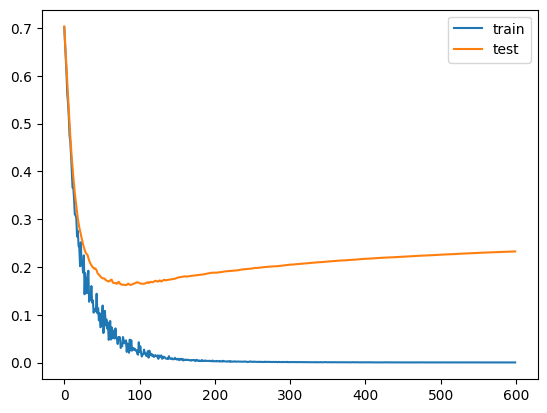

In [14]:
# TODO: Pokaż jak loss zmienia się w czasie
import pandas as pd 
pd.Series(losses).plot(label='train')
pd.Series(test_losses).plot(label='test')
plt.legend()

tensor([1.0000], grad_fn=<SigmoidBackward0>)

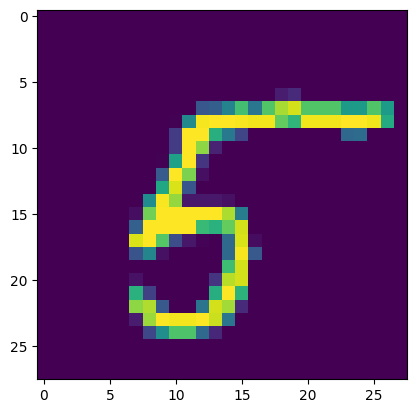

In [18]:
# TODO: spróbuj odgadanąć jaka cyfra jest w 10 elemencie zbioru testowego 
N = 27
single_x_test = x_test[N]
single_img = single_x_test.reshape((28,28))
plt.imshow(single_img)

model.forward(torch.Tensor(single_x_test))


In [19]:
# Accuracy 
# TODO: policz ile % zbioru testowego nasz model odgaduje poprawnie 

def accuracy(model, x_test, y_test):
    threshold_proba = 0.5
    correct_count = 0 
    for i, x_single in enumerate(x_test):
        true_y_single = y_test[i]
        x_tensor = torch.Tensor(x_single)
        
        result = model.forward(x_tensor) # wykonaj forward pass 
        probability_of_5 = result.detach().numpy()[0]
        if probability_of_5 > threshold_proba and true_y_single == 1:
            correct_count += 1
            continue 
        if probability_of_5 < threshold_proba and true_y_single == 0:
            correct_count += 1
            continue     
    return correct_count / len(x_test)


In [20]:
accuracy(model, x_test, y_test_bin)

0.943031536113937